# Business Metrics

### A good metric should have the following characteristics:
- Accurate
- Simple and intelligible
- Easy to drill down into
- Actionable
- Dynamic
- Standardized

### Net Promoter Score
- Cusotmer success metric that quantifies customer satisfaction
- Example question: 'How likely are you to recommend this product to a friend?'
- Scale can range from 0-10
- 0-6 are detractors, 7-8 are passive, 9-10 are promotoers
- NPS is calculated as the percentage of promoters minus the percentage of detractors

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# Metric # 1: NPS

- Testing our NPS metric with a basic dataset of customers with a date and user_id

In [2]:
# function to categorize scores between 0-10
def categorize(score):
    if score <= 6:
        return 'Detractor'
    elif score < 9:
        return 'Passive'
    elif score <= 10:
        return 'Promoter'

In [3]:
# random test series to test our function
test = np.random.randint(1,11,100)

In [4]:
# converting our test series to a dataframe
test_df = pd.DataFrame(test)

In [5]:
# applying our function to the test dataframe
test_df['category'] = test_df[0].apply(categorize)
test_df.sample(5)

,0,category
84,10,Promoter
97,10,Promoter
27,1,Detractor
93,2,Detractor
9,8,Passive


In [6]:
# reading in our dataset of customers with an event date user_id and score
df  = pd.read_csv('nps.csv', parse_dates=['event_date'])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [7]:
df.shape

(3326, 3)

In [8]:
# creating a year_month column using pandas dt accessor from our event_date 
df['yearmonth'] = (df['event_date']).dt.strftime('%Y%m').astype('int')

In [9]:
df.head(2)

,event_date,user_id,score,yearmonth
0,2020-01-01 19:00:51,290067447,8,202001
1,2020-01-02 17:34:43,223014806,10,202001


In [10]:
df['category'] = df['score'].apply(categorize)

In [11]:
df.head(2)

,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promoter


In [12]:
# creating a pivot table from our df with the yearmonth as the index, category as a column and aggregating by size
nps = df.pivot_table(index='yearmonth', columns='category', aggfunc='size')

In [13]:
nps.head()

category,Detractor,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191


In [14]:
# summing the rows to get the total
nps['total_responses'] = nps['Detractor'] + nps['Passive'] + nps ['Promoter']

In [15]:
nps.head(2)

category,Detractor,Passive,Promoter,total_responses
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273


In [16]:
# getting the nps rate by subtracting promoter from detractor and dividing sum by total responses
nps['nps'] = (nps['Promoter'] - nps['Detractor']) / nps['total_responses']
nps.head()

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,0.560976
202002,22,90,161,273,0.509158
202003,33,72,125,230,0.400000
202004,36,87,178,301,0.471761
202005,33,83,191,307,0.514658


In [17]:
# multiplying the ratio by 100 and casting it as an integer to get our percentage
nps['nps'] = (nps['nps']* 100).astype(int)

In [18]:
nps.head()

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51


In [19]:
# plotting nps over time to get a sense of the trend

ax = nps.reset_index().plot(kind='line', x='yearmonth', y='nps', figsize=(12,6))
#ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text('')
ax.set_ylim(0,60)

(0, 60)

# MEtric # 2: Churned

- When a customer stops being a customer, they have churned
- Churn rate is the % of customers that churaned in a given time period
- number of churned customers /  total customers

In [20]:
# using gym dataset to explore the churned metric
subs = pd.read_csv('muscle_labs.csv', parse_dates=['end_date', 'start_date'])

In [21]:
# the dataset cunsistes of a customer_id, start and end dates and subscription type
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [22]:
# we want to explore the monthly churn rate from before Dec 2014
# we'll create a column in YYYYMM format to get the month they churned
subs['churn_month'] = subs['end_date'].dt.strftime('%Y%m').astype('int')

In [23]:
subs.head(2)

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411


In [24]:
# creating a new dataframe with the count of customers who churn by month
monthly_churn = subs[['churn_month','customer_id']].groupby('churn_month').count()

In [25]:
# renaming the count column to total_churned
monthly_churn.rename(columns={'customer_id':'total_churned'}, inplace=True)

In [26]:
# the new dataframe starts with march meaning there is no churn data for Jan and Feb; we will need to display the non-values
monthly_churn.head()

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


In [27]:
monthly_churn.columns

Index(['total_churned'], dtype='object')

In [28]:
# we're going to create a new dataframe that has all months from 01-2011 through 12-2015
years = list(range(2011,2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
yearmonths[:5]

[201101, 201102, 201103, 201104, 201105]

In [29]:
# there isn't data for 12-2015 so we'll drop that for now
yearmonths = yearmonths[:-1]

In [30]:
# we'll now convert our list to a dataframe in order to merge it with our monthly_churn dataset
churn = pd.DataFrame({'yearmonth': yearmonths})
churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


In [31]:
# merging the two dataframes, the yearmonth is a column in churn df and the index in monthly_churn df
churn = pd.merge(churn, monthly_churn, how='left', left_on='yearmonth', right_index=True )

In [32]:
churn.head()

,yearmonth,total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [33]:
# fillng the NaN values with 0
churn.fillna(0, inplace=True)

In [34]:
churn.head(2)

,yearmonth,total_churned
0,201101,0.0
1,201102,0.0


In [35]:
# changing the total_churned from float to int
churn['total_churned'] = churn['total_churned'].astype('int')

In [36]:
churn.head(2)

,yearmonth,total_churned
0,201101,0
1,201102,0


We now have the customers who churned per month and we now need to decide how to calculate the total customers since the number of customers changes day to day. We can decide from a couple options.

- number of customers at the beginning of a time period
- the mean between the number of customers at the beg and end of the same time period 
- the average throughtout a time period

We'll go with the first here since it's easy to explain and easy to extract

In [37]:
subs.head(2)

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411


In [38]:
churn.head(2)

,yearmonth,total_churned
0,201101,0
1,201102,0


In [39]:
# function to get sum of customers where the start_date is before the first of a given month
# and where end_date is after than the last day of the previous month
# need to use yearmonth//100 to drop the decimals
def tot_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    
    return ((subs['start_date'] < date) & (date <= subs['end_date'])).sum()

In [40]:
# adding total_customers by applying the function to the yearmonth column
churn['total_customers'] = churn['yearmonth'].apply(tot_customers)
churn.head(2)

,yearmonth,total_churned,total_customers
0,201101,0,0
1,201102,0,17


In [41]:
# calculating the churn_rate per month
churn['churn_rate'] = churn['total_churned'] / churn['total_customers']
churn['yearmonth'] = churn['yearmonth'].astype(str)
churn.head()

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0,0,NaN
1,201102,0,17,0.000000
2,201103,8,47,0.170213
3,201104,16,82,0.195122
4,201105,29,105,0.276190


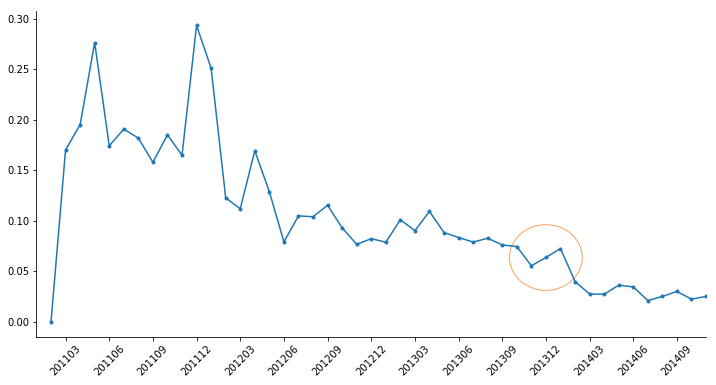

In [42]:
# plotting the churn_rate over time

arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False
                   )
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

The graph above shows us the churn rate was erratic the first few months and then it steadily declined over time. There is a spike in the area circled and that may be due to the difference between annual and monthly subscriptions. If we split the data by subscription type we may be able to drill down to find the cause of the spike and then identify customers to re-engage.